In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Introducción

En este documento exploraremos un ejemplo de segmentación por uso/comportamiento. Este tipo de segmentación se utiliza, generalmente, para diseñar estrategias de marketing de productos que se adapten a las características de los clientes de cada segmento.    

Los datos que utilizaremos corresponden a registros de uso de clientes de una compañía telefónica. La tabla contiene 55 variables que resumen la utilización que hacen sus usuarios de los servicios de la compañía. 

In [ ]:
dat = pd.read_excel("TELCOS SEGMENTATION MODELING DATA.xls")
dat.head()

,CUST_ID,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
0,C10001,9.959105,9.543413,0.755283,25.070877,3.224588,26.999948,23.938515,85.208720,0.952386,...,0.702530,0.297470,0.724905,0.275095,0.958260,0.075838,0.928553,0.119429,0.697638,1.019744
1,C10002,62.621553,61.004625,13.382496,55.258668,14.570813,58.832688,339.326176,400.972355,261.548570,...,0.766309,0.233691,0.817772,0.182228,0.974179,0.213704,0.939251,0.247665,1.957842,2.277142
2,C10003,37.708142,38.431589,3.457559,32.674331,5.602626,33.909000,201.631700,275.943749,6.485728,...,0.739523,0.260477,0.803432,0.196568,1.019185,0.091693,0.963589,0.165225,0.980638,0.736401
3,C10004,11.657388,5.812149,4.521838,26.685568,7.822684,32.037527,13.380224,80.397415,10.300143,...,0.676602,0.323398,0.845814,0.154186,0.498581,0.387895,0.832947,0.244173,0.356061,0.320284
4,C10005,22.688819,16.822096,2.902318,37.656375,3.455395,40.061273,22.682055,60.782144,2.323378,...,0.772988,0.227012,0.475572,0.524428,0.741427,0.127918,0.939970,0.086253,0.801681,0.418284


In [ ]:
dat.describe()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,IN_COMMUNITY_VOICE,IN_COMMUNITY_SMS,IN_COMMUNITY_TOTAL,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,...,PRC_IN_CALLS_PEAK,PRC_IN_CALLS_OFFPEAK,PRC_IN_CALLS_WORK,PRC_IN_CALLS_NONWORK,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_IN_COMMUNITY_VOICE,PRC_IN_COMMUNITY_SMS,ACD_OUT,ACD_IN
count,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,...,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000,6624.000000
mean,32.269836,28.968624,3.704776,37.820298,6.138785,42.095787,116.655665,159.276412,11.483907,0.114997,...,0.723755,0.274887,0.801148,0.198852,0.890168,0.125445,0.869218,0.174845,0.908297,1.025924
std,24.996685,23.369668,5.275259,34.267828,5.572866,35.250228,117.661546,146.705906,28.514316,0.753162,...,0.089384,0.085905,0.065326,0.065326,0.118922,0.137132,0.101211,0.118671,0.612846,0.472697
min,0.152062,0.000000,0.000000,0.000000,0.000000,0.453059,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.425826,0.015128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.324789,13.393002,0.497163,16.314908,2.610711,19.628738,41.400124,65.484469,0.575036,0.000000,...,0.671753,0.214346,0.758217,0.154321,0.823860,0.022246,0.815924,0.086371,0.654027,0.738502
50%,25.942147,22.801510,1.948303,28.356311,4.607795,32.813586,81.266540,120.108829,2.621533,0.000000,...,0.729871,0.269836,0.801933,0.198067,0.911314,0.078179,0.886360,0.146954,0.824533,0.930241
75%,41.958228,37.647889,4.809508,48.267258,7.789929,53.684427,149.673051,204.769862,9.785461,0.000000,...,0.785334,0.327793,0.845679,0.241783,0.976701,0.189630,0.939808,0.238248,1.052067,1.192416
max,294.000941,287.704795,71.716693,552.768533,68.730875,544.735693,1186.278974,1613.209852,536.409402,29.457604,...,0.939072,0.765689,0.984872,0.574174,1.106545,1.078336,1.092487,1.102448,17.637138,6.746601


Entre las 55 variables, el equipo de marketing selecciona las siguientes para la segmentación por uso:

In [ ]:
seg_dat = dat[["OUT_COMMUNITY_TOTAL", "OUT_COMMUNITY_VOICE", "OUT_COMMUNITY_SMS", "VOICE_OUT_CALLS", "VOICE_IN_CALLS", "SMS_OUT_CALLS", "MMS_OUT_CALLS", "EVENTS_CALLS", "INTERNET_CALLS", "TOTAL_OUT_CALLS", "VOICE_OUT_MINS", "VOICE_IN_MINS", "EVENTS_TRAFFIC", "GPRS_TRAFFIC", "OUT_CALLS_ROAMING", "OUT_MINS_ROAMING", "OUT_CALLS_INTERNATIONAL", "OUT_MINS_INTERNATIONAL", "DAYS_OUT", "DAYS_IN", "ACD_OUT", "ACD_IN", "PRC_OUT_COMMUNITY_VOICE", "PRC_OUT_COMMUNITY_SMS", "PRC_VOICE_OUT_CALLS", "PRC_SMS_OUT_CALLS", "PRC_MMS_OUT_CALLS", "PRC_EVENTS_CALLS", "PRC_INTERNET_CALLS", "PRC_OUT_CALLS_ROAMING", "PRC_OUT_CALLS_INTERNATIONAL"]]
seg_dat.columns

Index(['OUT_COMMUNITY_TOTAL', 'OUT_COMMUNITY_VOICE', 'OUT_COMMUNITY_SMS',
       'VOICE_OUT_CALLS', 'VOICE_IN_CALLS', 'SMS_OUT_CALLS', 'MMS_OUT_CALLS',
       'EVENTS_CALLS', 'INTERNET_CALLS', 'TOTAL_OUT_CALLS', 'VOICE_OUT_MINS',
       'VOICE_IN_MINS', 'EVENTS_TRAFFIC', 'GPRS_TRAFFIC', 'OUT_CALLS_ROAMING',
       'OUT_MINS_ROAMING', 'OUT_CALLS_INTERNATIONAL', 'OUT_MINS_INTERNATIONAL',
       'DAYS_OUT', 'DAYS_IN', 'ACD_OUT', 'ACD_IN', 'PRC_OUT_COMMUNITY_VOICE',
       'PRC_OUT_COMMUNITY_SMS', 'PRC_VOICE_OUT_CALLS', 'PRC_SMS_OUT_CALLS',
       'PRC_MMS_OUT_CALLS', 'PRC_EVENTS_CALLS', 'PRC_INTERNET_CALLS',
       'PRC_OUT_CALLS_ROAMING', 'PRC_OUT_CALLS_INTERNATIONAL'],
      dtype='object')

# Exploración de datos

Todas las variables son numéricas:

In [ ]:
seg_dat.dtypes

OUT_COMMUNITY_TOTAL            float64
OUT_COMMUNITY_VOICE            float64
OUT_COMMUNITY_SMS              float64
VOICE_OUT_CALLS                float64
VOICE_IN_CALLS                 float64
SMS_OUT_CALLS                  float64
MMS_OUT_CALLS                  float64
EVENTS_CALLS                   float64
INTERNET_CALLS                 float64
TOTAL_OUT_CALLS                float64
VOICE_OUT_MINS                 float64
VOICE_IN_MINS                  float64
EVENTS_TRAFFIC                 float64
GPRS_TRAFFIC                   float64
OUT_CALLS_ROAMING              float64
OUT_MINS_ROAMING               float64
OUT_CALLS_INTERNATIONAL        float64
OUT_MINS_INTERNATIONAL         float64
DAYS_OUT                       float64
DAYS_IN                        float64
ACD_OUT                        float64
ACD_IN                         float64
PRC_OUT_COMMUNITY_VOICE        float64
PRC_OUT_COMMUNITY_SMS          float64
PRC_VOICE_OUT_CALLS            float64
PRC_SMS_OUT_CALLS        

Sin datos faltantes:

In [ ]:
seg_dat.isna().sum()

OUT_COMMUNITY_TOTAL            0
OUT_COMMUNITY_VOICE            0
OUT_COMMUNITY_SMS              0
VOICE_OUT_CALLS                0
VOICE_IN_CALLS                 0
SMS_OUT_CALLS                  0
MMS_OUT_CALLS                  0
EVENTS_CALLS                   0
INTERNET_CALLS                 0
TOTAL_OUT_CALLS                0
VOICE_OUT_MINS                 0
VOICE_IN_MINS                  0
EVENTS_TRAFFIC                 0
GPRS_TRAFFIC                   0
OUT_CALLS_ROAMING              0
OUT_MINS_ROAMING               0
OUT_CALLS_INTERNATIONAL        0
OUT_MINS_INTERNATIONAL         0
DAYS_OUT                       0
DAYS_IN                        0
ACD_OUT                        0
ACD_IN                         0
PRC_OUT_COMMUNITY_VOICE        0
PRC_OUT_COMMUNITY_SMS          0
PRC_VOICE_OUT_CALLS            0
PRC_SMS_OUT_CALLS              0
PRC_MMS_OUT_CALLS              0
PRC_EVENTS_CALLS               0
PRC_INTERNET_CALLS             0
PRC_OUT_CALLS_ROAMING          0
PRC_OUT_CA

## Distribución
Verificamos, visualmente, la distribución de los datos:

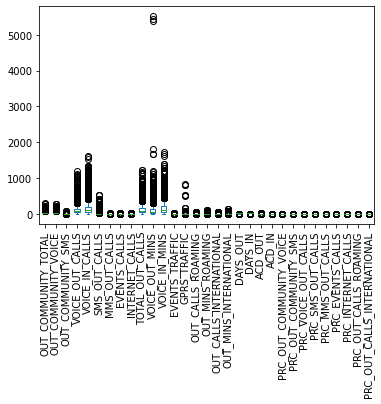

In [ ]:
seg_dat.plot.box(rot=90)

¿Datos atípicos?

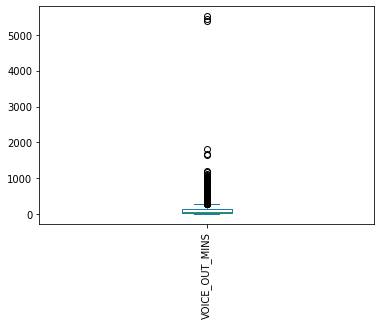

In [ ]:
seg_dat["VOICE_OUT_MINS"].plot.box(rot=90)

In [ ]:
seg_dat["VOICE_OUT_MINS"].describe()

count    6624.000000
mean      112.463145
std       175.510066
min         0.000000
25%        30.536386
50%        66.201116
75%       135.635535
max      5518.664136
Name: VOICE_OUT_MINS, dtype: float64

# Preparación de los datos

<font color="red">Eliminamos los datos atípicos</font>. 

**Nota**: en la práctica deberíamos revisar el linaje de los datos buscando explicar esos valores *anormalmente* altos. Si son errores, es preferible corregirlos, si son valores correctos, reflexionar si deben emplearse o no (depende de la aplicación). Para la segmenatación, esos valores atípicos llevarán a la identificación de segmentos poco representativos, por lo que es mejor eliminarlos. 

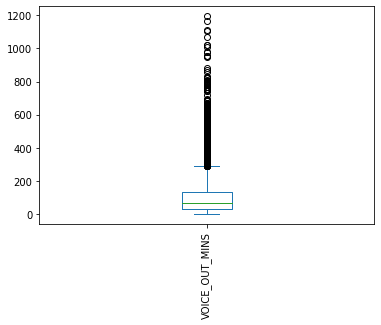

In [ ]:
seg_dat = seg_dat[seg_dat["VOICE_OUT_MINS"]<1250]
seg_dat["VOICE_OUT_MINS"].plot.box(rot=90)

In [ ]:
seg_dat.describe()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,EVENTS_CALLS,INTERNET_CALLS,TOTAL_OUT_CALLS,...,ACD_IN,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_VOICE_OUT_CALLS,PRC_SMS_OUT_CALLS,PRC_MMS_OUT_CALLS,PRC_EVENTS_CALLS,PRC_INTERNET_CALLS,PRC_OUT_CALLS_ROAMING,PRC_OUT_CALLS_INTERNATIONAL
count,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,...,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000,6618.000000
mean,32.228671,28.926249,3.703625,116.179786,159.261794,11.486022,0.114174,0.710373,0.253658,133.903778,...,1.025202,0.890137,0.125497,0.856758,0.081121,0.000706,0.007423,0.002747,0.006037,0.006309
std,24.936657,23.294873,5.277005,116.268221,146.705699,28.527036,0.752373,1.822621,1.327856,129.047754,...,0.471998,0.118937,0.137183,0.166119,0.121300,0.003496,0.022114,0.016095,0.025363,0.019636
min,0.152062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150582,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.320374,13.391918,0.497024,41.391942,65.549017,0.499748,0.000000,0.000000,0.000000,50.174985,...,0.738455,0.823765,0.022198,0.797586,0.006280,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.894460,22.761449,1.944290,81.170247,120.108829,2.616756,0.000000,0.162040,0.000000,94.856767,...,0.929859,0.911314,0.078227,0.904870,0.030845,0.000000,0.001803,0.000000,0.000000,0.000000
75%,41.947616,37.642353,4.806015,149.395398,204.725200,9.775904,0.000000,0.661459,0.000000,169.640568,...,1.191699,0.976607,0.189699,0.966889,0.103682,0.000000,0.006782,0.000000,0.000000,0.004029
max,294.000941,287.704795,71.716693,1186.278974,1613.209852,536.409402,29.457604,37.402894,31.136726,1230.395654,...,6.746601,1.106545,1.078336,1.097839,1.068405,0.067655,0.608261,0.410017,0.490549,0.328417



## Escalamiento

Las variables presentane scalas muy diversas por lo que deben ser estandarizadas.

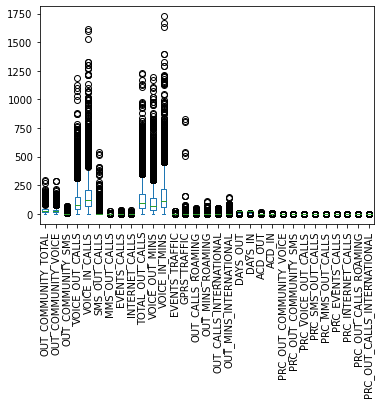

In [ ]:
seg_dat.plot.box(rot=90)

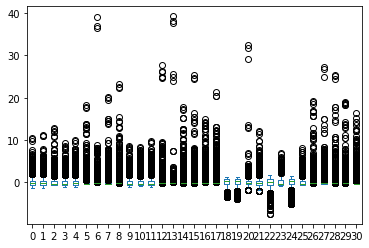

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
seg_dat_st = scaler.fit_transform(seg_dat)
seg_dat_st = pd.DataFrame(seg_dat_st)
seg_dat_st.plot.box()

## Datos atípicos

Apliaremos un enfoque moderado y consideremos dato atípico a cualquiera cuyo valor absoluto sea mayor a 5 (desviaciones estándar de la media)   

In [ ]:
outlier_data = seg_dat_st.abs() > 3
any_outlier = outlier_data.any(axis=1) #¿existe algún valor atípico en la fila?
any_outlier  

0       False
1        True
2       False
3        True
4        True
        ...  
6613    False
6614     True
6615    False
6616    False
6617    False
Length: 6618, dtype: bool

¿Cuántas filas eliminaremos?

In [ ]:
sum(any_outlier)/len(any_outlier)*100 #los outliers se distribuirán a los grupos con los que mayor similitud tengan

20.746449078271382

In [ ]:
seg_dat_sub = seg_dat_st[~any_outlier.values]
seg_dat_sub.columns = seg_dat.columns
seg_dat_sub.describe()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,EVENTS_CALLS,INTERNET_CALLS,TOTAL_OUT_CALLS,...,ACD_IN,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_VOICE_OUT_CALLS,PRC_SMS_OUT_CALLS,PRC_MMS_OUT_CALLS,PRC_EVENTS_CALLS,PRC_INTERNET_CALLS,PRC_OUT_CALLS_ROAMING,PRC_OUT_CALLS_INTERNATIONAL
count,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,...,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000
mean,-0.123052,-0.109669,-0.163738,-0.134304,-0.128331,-0.161066,-0.096758,-0.119910,-0.111412,-0.171191,...,-0.102056,0.107826,-0.149621,0.205962,-0.145683,-0.107042,-0.088548,-0.096981,-0.116842,-0.126340
std,0.704818,0.702323,0.627691,0.661986,0.678885,0.406399,0.232038,0.461082,0.288993,0.636240,...,0.738354,0.834719,0.786904,0.708570,0.714540,0.392341,0.423052,0.286423,0.374798,0.435919
min,-1.256256,-1.203106,-0.701895,-0.983472,-1.042047,-0.402667,-0.151763,-0.389783,-0.191043,-1.006186,...,-1.743429,-2.987802,-0.914888,-2.996982,-0.668810,-0.202061,-0.335716,-0.170702,-0.238054,-0.321316
25%,-0.658531,-0.640944,-0.611337,-0.619833,-0.624340,-0.385986,-0.151763,-0.389783,-0.191043,-0.643958,...,-0.618944,-0.436755,-0.774561,-0.121768,-0.622236,-0.202061,-0.335716,-0.170702,-0.238054,-0.321316
50%,-0.277886,-0.275340,-0.390632,-0.314713,-0.299358,-0.328848,-0.151763,-0.301899,-0.191043,-0.339892,...,-0.238346,0.233019,-0.423761,0.376744,-0.453790,-0.202061,-0.254403,-0.170702,-0.238054,-0.321316
75%,0.255284,0.268213,0.066621,0.176765,0.185482,-0.138352,-0.151763,-0.049695,-0.191043,0.129771,...,0.273997,0.754932,0.245506,0.700031,0.028323,-0.202061,-0.043523,-0.170702,-0.238054,-0.153655
max,2.961189,2.963204,2.990218,2.999782,2.879241,2.719581,2.693509,2.986241,2.923849,2.950733,...,2.963390,1.819651,2.960805,1.451364,2.973045,2.974290,2.821018,2.866907,2.997079,2.986931


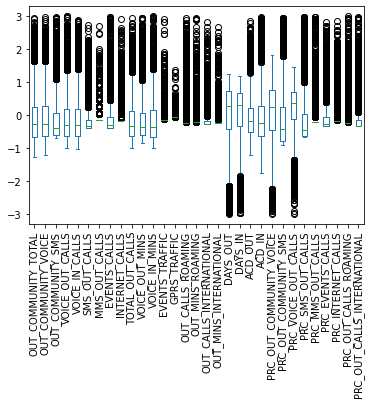

In [ ]:
seg_dat_sub.plot.box(rot=90)

In [ ]:
len(seg_dat_sub) 

5245

## Correlación entre variables

Cabe señalar que muchas parejas de variables están altamente correlacionadas.


In [ ]:
seg_dat_sub.corr()

,OUT_COMMUNITY_TOTAL,OUT_COMMUNITY_VOICE,OUT_COMMUNITY_SMS,VOICE_OUT_CALLS,VOICE_IN_CALLS,SMS_OUT_CALLS,MMS_OUT_CALLS,EVENTS_CALLS,INTERNET_CALLS,TOTAL_OUT_CALLS,...,ACD_IN,PRC_OUT_COMMUNITY_VOICE,PRC_OUT_COMMUNITY_SMS,PRC_VOICE_OUT_CALLS,PRC_SMS_OUT_CALLS,PRC_MMS_OUT_CALLS,PRC_EVENTS_CALLS,PRC_INTERNET_CALLS,PRC_OUT_CALLS_ROAMING,PRC_OUT_CALLS_INTERNATIONAL
OUT_COMMUNITY_TOTAL,1.000000,0.980847,0.326254,0.832858,0.684662,0.229604,0.069469,0.207404,0.032906,0.830277,...,0.026312,0.023512,-0.116746,0.152402,-0.086479,0.002894,-0.129220,-0.075804,-0.004670,0.052458
OUT_COMMUNITY_VOICE,0.980847,1.000000,0.235082,0.851817,0.690891,0.176065,0.064289,0.181822,0.029584,0.837846,...,0.002564,0.190910,-0.196701,0.215025,-0.151997,-0.002807,-0.152307,-0.079717,-0.016130,0.047634
OUT_COMMUNITY_SMS,0.326254,0.235082,1.000000,0.227827,0.224311,0.767504,0.178597,0.265368,0.072228,0.348100,...,0.193166,-0.435108,0.781953,-0.528469,0.647517,0.126425,0.085914,0.001349,0.062567,0.023627
VOICE_OUT_CALLS,0.832858,0.851817,0.227827,1.000000,0.651132,0.240037,0.107795,0.206654,0.052564,0.983140,...,-0.020648,0.178036,-0.146819,0.243344,-0.150680,0.016044,-0.168168,-0.076194,-0.043557,-0.010979
VOICE_IN_CALLS,0.684662,0.690891,0.224311,0.651132,1.000000,0.206196,0.066636,0.097204,0.029895,0.647290,...,0.015447,0.110081,-0.090275,0.144442,-0.059090,0.004279,-0.149347,-0.058007,-0.035107,-0.015135
SMS_OUT_CALLS,0.229604,0.176065,0.767504,0.240037,0.206196,1.000000,0.185390,0.165718,0.056664,0.384672,...,0.149830,-0.257833,0.618428,-0.560170,0.749580,0.117321,-0.002255,-0.018145,-0.004587,0.018988
MMS_OUT_CALLS,0.069469,0.064289,0.178597,0.107795,0.066636,0.185390,1.000000,0.131813,0.167866,0.136382,...,0.053085,-0.015769,0.134359,-0.086364,0.101031,0.886157,0.038745,0.090245,-0.009723,-0.027191
EVENTS_CALLS,0.207404,0.181822,0.265368,0.206654,0.097204,0.165718,0.131813,1.000000,0.113925,0.230885,...,0.011106,-0.116260,0.167711,-0.097384,0.085337,0.109407,0.709532,0.060871,0.010267,0.001779
INTERNET_CALLS,0.032906,0.029584,0.072228,0.052564,0.029895,0.056664,0.167866,0.113925,1.000000,0.064612,...,-0.007185,-0.017128,0.055813,-0.042277,0.015001,0.164572,0.067281,0.855204,-0.012679,-0.047297
TOTAL_OUT_CALLS,0.830277,0.837846,0.348100,0.983140,0.647290,0.384672,0.136382,0.230885,0.064612,1.000000,...,0.006379,0.120399,-0.033962,0.097607,-0.028536,0.037691,-0.155328,-0.071186,-0.017166,0.007950


Aunque se dispone de una gran cantidad de variables, la información es redundante (varias variables brindan información similar). **Es recomendable representar el conjunto de datos con menos variables**. Para este fin, utilziaremos la técncia de análisis de componentes principales.

## Análisis de componentes principales

La idea del análisis de componentes principales es la de definir un nuevo conjunto de variables que se obtienen **transformando linealmente a las originales**. Los siguientes son algunos ejemplos de nuevas variables que se han definido con este tipo de transformaciones:

* $\text{V_1} = 0.87\text{OUT_COMMUNITY_TOTAL}+0.65\text{VOICE_OUT_CALLS}-0.35\text{SMS_OUT_CALLS}$
* $\text{V_2} = -0.74\text{INTERNET_CALLS}-0.45\text{OUT_CALLS_INTERNATIONAL}$

En el análisis de componentes principales los coeficientes de estas combinaciones lineales se determina buscando que las nuevas variables:

1. Tengan la mayor varianza.
2. Sean ortogonales (perpendiculares) entre sí.  

A estas nuevas variables se les denomina **componentes principales**. La primera restricción permite que las componentes principales recuperen la información contenida en las variables originales mientras que la segunda exige que las componentes principales sean independientes (resolviendo el problema de la redundancia de información de las variables originales).



En la siguiente celda evaluamos las componentes principales para este conjunto de datos **(por espacio se muestran solo 8 pero deben ser 31, el mismo número de variables originales)**. En cada columna se presentan los coeficientes de las transformaciones que define cada componente principal.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(seg_dat_sub.columns))

pca_seg = pca.fit(seg_dat_sub)

La primera componente principal es:

In [ ]:
pd.Series(np.round(pca_seg.components_[0,:],2), index=seg_dat_sub.columns)

OUT_COMMUNITY_TOTAL            0.35
OUT_COMMUNITY_VOICE            0.35
OUT_COMMUNITY_SMS              0.11
VOICE_OUT_CALLS                0.33
VOICE_IN_CALLS                 0.30
SMS_OUT_CALLS                  0.06
MMS_OUT_CALLS                  0.02
EVENTS_CALLS                   0.05
INTERNET_CALLS                 0.01
TOTAL_OUT_CALLS                0.32
VOICE_OUT_MINS                 0.28
VOICE_IN_MINS                  0.28
EVENTS_TRAFFIC                 0.01
GPRS_TRAFFIC                   0.00
OUT_CALLS_ROAMING              0.03
OUT_MINS_ROAMING               0.02
OUT_CALLS_INTERNATIONAL        0.04
OUT_MINS_INTERNATIONAL         0.03
DAYS_OUT                       0.38
DAYS_IN                        0.34
ACD_OUT                        0.05
ACD_IN                         0.03
PRC_OUT_COMMUNITY_VOICE        0.07
PRC_OUT_COMMUNITY_SMS         -0.05
PRC_VOICE_OUT_CALLS            0.07
PRC_SMS_OUT_CALLS             -0.04
PRC_MMS_OUT_CALLS              0.01
PRC_EVENTS_CALLS            


**¿Cuántas componentes necesitamos?**

In [ ]:
pd.Series(np.cumsum(pca_seg.explained_variance_ratio_)*100)

0      34.005737
1      54.838247
2      62.530504
3      68.251536
4      72.891912
5      76.876968
6      80.443755
7      83.648110
8      86.154494
9      88.206073
10     90.172070
11     91.936471
12     93.369897
13     94.757292
14     96.060236
15     96.944577
16     97.685127
17     98.084640
18     98.464419
19     98.808875
20     99.059893
21     99.291667
22     99.446447
23     99.556328
24     99.665281
25     99.763758
26     99.850326
27     99.931902
28     99.974826
29     99.992797
30    100.000000
dtype: float64

Son necesarias solamente 6 componentes principales

In [ ]:
pca = PCA(n_components=6)

seg_pca = pca.fit_transform(seg_dat_sub)
seg_pca.shape

(5245, 6)

## Visualización

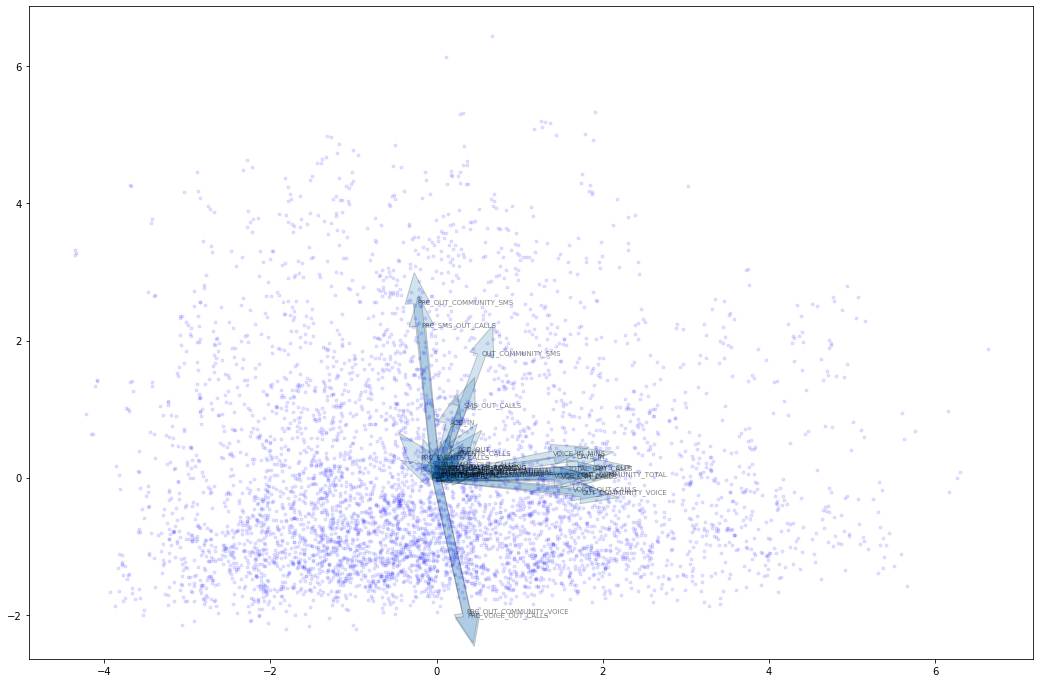

In [ ]:
fig=plt.figure(figsize=(18,12))
plt.plot(seg_pca[:,0], seg_pca[:,1], 'b.', alpha=0.1)

pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

for i,c in enumerate(seg_dat_sub.columns):
  plt.arrow(0,0,5*pc1[i],5*pc2[i], width=0.1, alpha=0.2)
  plt.annotate(c, (5*pc1[i],5*pc2[i]), alpha=0.5, fontsize=7)
plt.savefig("biplot.png")
plt.show()

# Segmentación

¿Cuántos grupos?

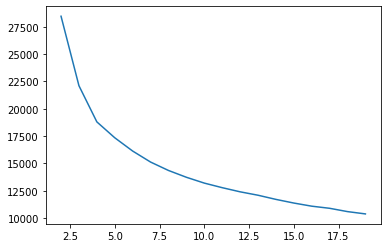

In [ ]:
from sklearn.cluster import KMeans

whithin_var = []

for k in range(2,20):
  km = KMeans(n_clusters=k)
  km.fit(seg_pca)
  whithin_var.append(km.inertia_)

plt.plot(range(2,20), np.array(whithin_var))
plt.show()

Consideremos 4-6 grupos

In [ ]:
km = KMeans(n_clusters=6)
grupos = km.fit(seg_pca)

grupos.labels_[:10]

array([1, 5, 5, 5, 5, 0, 5, 3, 5, 3], dtype=int32)

In [ ]:
seg_pca = pd.DataFrame({"pc1": seg_pca[:,0], "pc2": seg_pca[:,1], "segmento": grupos.labels_})
seg_pca.head()

,pc1,pc2,segmento
0,-1.719959,-0.492820,1
1,2.094580,-0.637357,5
2,1.993880,-1.437760,5
3,0.708658,0.143664,5
4,2.032297,-0.733135,5


## Visualización de los segmentos

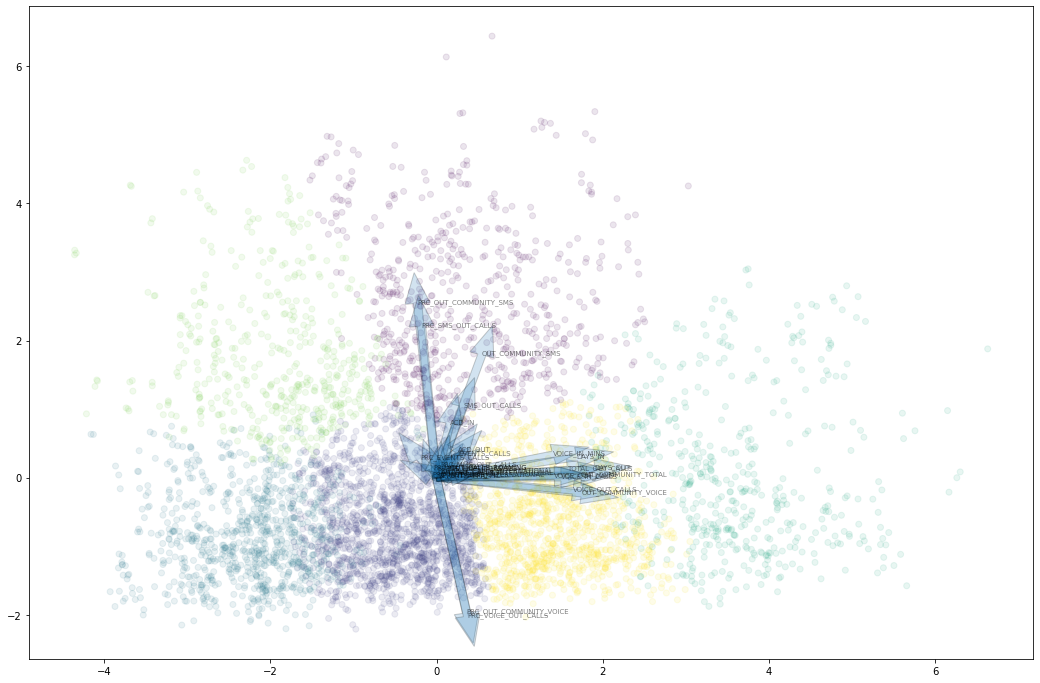

In [ ]:
fig=plt.figure(figsize=(18,12))

plt.scatter(seg_pca["pc1"], seg_pca["pc2"], c=seg_pca["segmento"], alpha=0.1)

pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

for i,c in enumerate(seg_dat_sub.columns):
  plt.arrow(0,0,5*pc1[i],5*pc2[i], width=0.1, alpha=0.2)
  plt.annotate(c, (5*pc1[i],5*pc2[i]), alpha=0.5, fontsize=7)

plt.savefig("segmentacion.png")
plt.show()

In [ ]:
rep_gpo = seg_pca.groupby("segmento").mean()
rep_gpo

,pc1,pc2
segmento,,
0,0.346791,2.482232
1,-0.443944,-0.665463
2,-2.208658,-0.853518
3,3.549108,0.048502
4,-1.910832,1.726727
5,1.430431,-0.639564


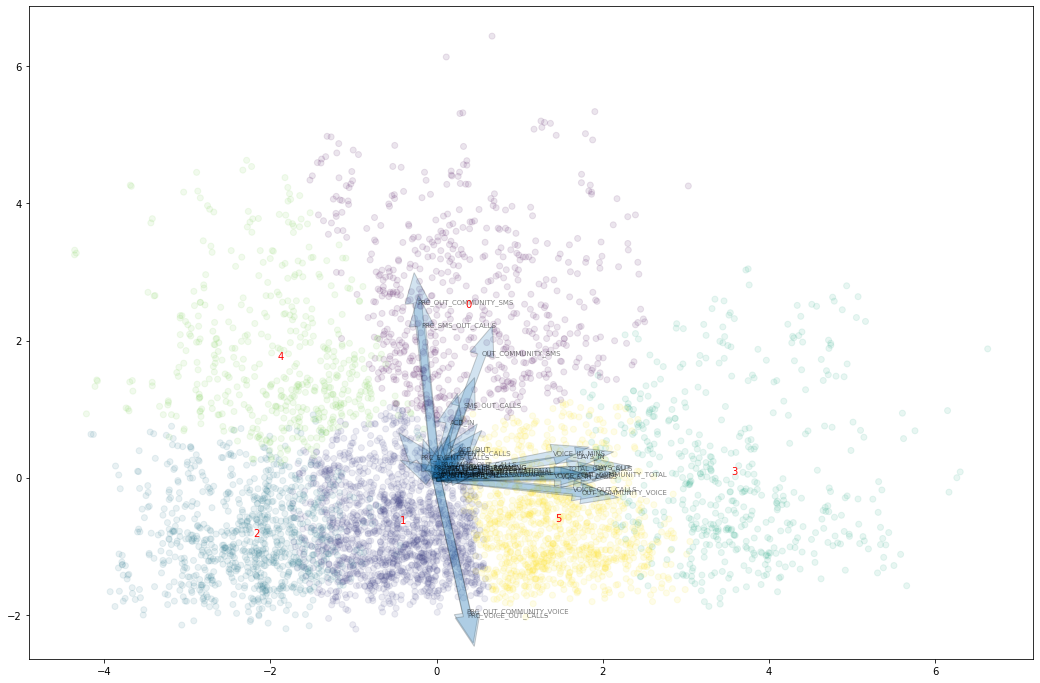

In [ ]:
fig=plt.figure(figsize=(18,12))

plt.scatter(seg_pca["pc1"], seg_pca["pc2"], c=seg_pca["segmento"], alpha=0.1)

pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

for i,c in enumerate(seg_dat_sub.columns):
  plt.arrow(0,0,5*pc1[i],5*pc2[i], width=0.1, alpha=0.2)
  plt.annotate(c, (5*pc1[i],5*pc2[i]), alpha=0.5, fontsize=7)

for i in range(len(rep_gpo)):
  g = rep_gpo.iloc[i]
  plt.annotate(str(i),(g["pc1"], g["pc2"]), color="r") 

plt.savefig("segmentacion.png")
plt.show()

En términos de las variables originales

In [ ]:
seg_dat_sub["segmento"] = grupos.labels_
seg_dat_sub.groupby("segmento").mean().transpose()

<ipython-input-79-de2da4fd3e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_dat_sub["segmento"] = grupos.labels_


segmento,0,1,2,3,4,5
OUT_COMMUNITY_TOTAL,-0.071414,-0.370939,-0.812376,1.299250,-0.660516,0.347400
OUT_COMMUNITY_VOICE,-0.187585,-0.328011,-0.765058,1.319682,-0.712429,0.394915
OUT_COMMUNITY_SMS,0.844029,-0.446388,-0.586146,0.274102,0.033503,-0.314385
VOICE_OUT_CALLS,-0.192475,-0.359518,-0.709988,1.256598,-0.690294,0.300644
VOICE_IN_CALLS,-0.080408,-0.311331,-0.760331,0.938070,-0.640157,0.357147
SMS_OUT_CALLS,0.493047,-0.326095,-0.374012,0.077753,-0.135571,-0.268876
MMS_OUT_CALLS,0.005737,-0.122490,-0.142221,-0.088453,-0.131494,-0.072792
EVENTS_CALLS,0.066394,-0.180513,-0.279428,0.105939,-0.125657,-0.118521
INTERNET_CALLS,-0.077843,-0.108343,-0.167420,-0.092386,-0.106042,-0.102609
TOTAL_OUT_CALLS,-0.050932,-0.418683,-0.755848,1.158597,-0.656341,0.191217
